In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
cd drive/MyDrive/fgsm 실습 폴더

/content/drive/MyDrive/fgsm 실습 폴더


In [5]:
!pip install import_ipynb
import import_ipynb
import pyimagesearch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.2 MB/s eta 0:00:00


In [6]:
from pyimagesearch.simplecnn import SimpleCNN
from pyimagesearch.fgsm import generate_image_adversary_target
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10 # CIFAR-10로 변경
import numpy as np
import cv2

importing Jupyter notebook from /content/drive/MyDrive/fgsm 실습 폴더/pyimagesearch/simplecnn.ipynb
importing Jupyter notebook from /content/drive/MyDrive/fgsm 실습 폴더/pyimagesearch/fgsm.ipynb


In [7]:
# import the necessary packages
from pyimagesearch.simplecnn import SimpleCNN
from pyimagesearch.fgsm import generate_image_adversary
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# load MNIST dataset and scale the pixel values to the range [0, 1]
print("[INFO] loading cifar10 dataset...")
(trainX, trainY), (testX, testY) = cifar10.load_data()
trainX = trainX / 255.0
testX = testX / 255.0
# add a channel dimension to the images
trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)
# one-hot encode our labels
trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)



# initialize our optimizer and model
print("[INFO] compiling model...")
opt = Adam(lr=1e-3)
model = SimpleCNN.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
# train the simple CNN on MNIST
print("[INFO] training network...")
model.fit(trainX, trainY,validation_data=(testX, testY),batch_size=64,epochs=10,verbose=1)
# make predictions on the testing set for the model trained on
# non-adversarial images
(loss, acc) = model.evaluate(x=testX, y=testY, verbose=0)
print("[INFO] loss: {:.4f}, acc: {:.4f}".format(loss, acc))



[INFO] loading cifar10 dataset...
170498071/170498071 [==============================] - 3s 0us/step


[INFO] compiling model...
[INFO] training network...
Epoch 1/10
782/782 [==============================] - 13s 7ms/step - loss: 1.6566 - accuracy: 0.4366 - val_loss: 1.2927 - val_accuracy: 0.5402
Epoch 2/10
782/782 [==============================] - 6s 7ms/step - loss: 1.1862 - accuracy: 0.5774 - val_loss: 1.1219 - val_accuracy: 0.5993
Epoch 3/10
782/782 [==============================] - 4s 6ms/step - loss: 1.0330 - accuracy: 0.6370 - val_loss: 1.2159 - val_accuracy: 0.5681
Epoch 4/10
782/782 [==============================] - 4s 6ms/step - loss: 0.9290 - accuracy: 0.6734 - val_loss: 0.9416 - val_accuracy: 0.6720
Epoch 5/10
782/782 [==============================] - 6s 7ms/step - loss: 0.8434 - accuracy: 0.7046 - val_loss: 0.9702 - val_accuracy: 0.6609
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.7769 - accuracy: 0.7262 - val_loss: 0.9448 - val_accuracy: 0.6692
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 0.7191 - accuracy: 0

In [8]:
#훈련된 모델에 대한 테스트 세트의 예측 수행
(loss,acc)=model.evaluate(x=testX,y=testY,verbose=0)
print("[INFO] loss: {:.4f}, acc: {:.4f}".format(loss, acc))

[INFO] loss: 0.9641, acc: 0.6806


1/1 [==============================] - 0s 22ms/step


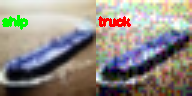

1/1 [==============================] - 0s 19ms/step


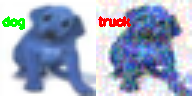

1/1 [==============================] - 0s 18ms/step


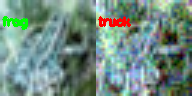

1/1 [==============================] - 0s 19ms/step


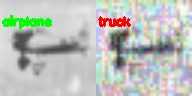

1/1 [==============================] - 0s 18ms/step


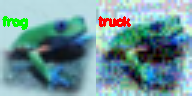

1/1 [==============================] - 0s 17ms/step


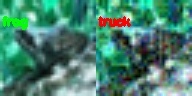

1/1 [==============================] - 0s 17ms/step


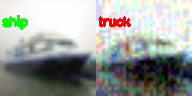

1/1 [==============================] - 0s 18ms/step


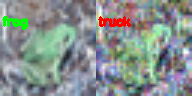

1/1 [==============================] - 0s 17ms/step


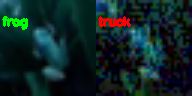

1/1 [==============================] - 0s 19ms/step


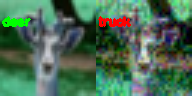

In [12]:

from google.colab.patches import cv2_imshow

import cv2

image_label=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
target=np.array([0,0,0,0,0,0,0,0,0,1]).reshape(1, 10) #유도를 원하는 라벨의 위치에 1 기입

#테스트 이미지들 샘플링 반복
for _ in range(10):
  # 테스트 이미지들 중에서 무작위로 샘플링
  i=np.random.choice(np.arange(0,len(testX)))

  #현재 이미지와 라벨을 가져오기
  image=testX[i]
  label=testY[i]

  #현재 이미지에 대한 적대적 이미지를 생성하고 적대적 예측
  adversary=generate_image_adversary_target(model, image.reshape(1,32,32,3),target,eps=0.1)
  pred = model.predict(adversary)

  # 원본 이미지와 적대적 이미지를 원하는 범위로 크기 조정 [0, 255]와 8비트 정수로 변환
  adversary = adversary.reshape((32, 32,3)) * 255
  adversary = np.clip(adversary, 0, 255).astype("uint8")
  image = image.reshape((32, 32, 3)) * 255
  image = image.astype("uint8")

  # 이미지의 크기를 조정해서 더 잘 볼 수 있게 함
  image = cv2.resize(image, (96, 96))
  adversary = cv2.resize(adversary, (96, 96))

  #원본 이미지와 적대적 이미지에 대한 예측 레이블을 결정합니다
  image_Pred=label.argmax()
  adversaryPred=pred[0].argmax()
  color=(0,255,0)

  # 만약 이미지 예측이 적대적 예측과 같지않다면 예측 후에 색을 바꾼다.
  if image_Pred!=adversaryPred:
    color=(0,0,255)


  # 각각 출력 이미지의 예측을 그린다.
  cv2.putText(image, image_label[image_Pred], (2, 25),
                cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 2)

  cv2.putText(adversary, image_label[adversaryPred], (2, 25),
                cv2.FONT_HERSHEY_SIMPLEX, 0.4, color, 2)

  # 원본 이미지와 적대적 이미지를 옆으로 이어서 하나의 이미지로 표시
  output = np.hstack([image, adversary])
  cv2_imshow( output)
  cv2.waitKey(0)

1/1 [==============================] - 0s 20ms/step


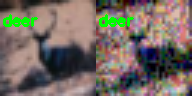

1/1 [==============================] - 0s 16ms/step


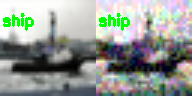

1/1 [==============================] - 0s 27ms/step


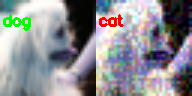

1/1 [==============================] - 0s 31ms/step


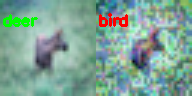

1/1 [==============================] - 0s 39ms/step


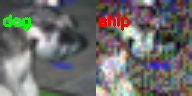

1/1 [==============================] - 0s 27ms/step


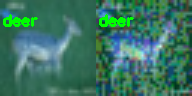

1/1 [==============================] - 0s 29ms/step


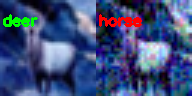

1/1 [==============================] - 0s 92ms/step


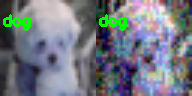

1/1 [==============================] - 0s 31ms/step


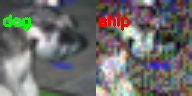

1/1 [==============================] - 0s 83ms/step


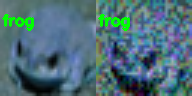

1/1 [==============================] - 0s 17ms/step


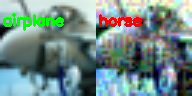

1/1 [==============================] - 0s 16ms/step


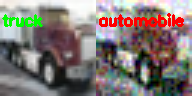

1/1 [==============================] - 0s 16ms/step


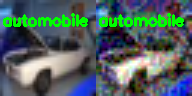

1/1 [==============================] - 0s 17ms/step


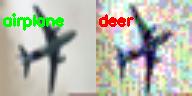

1/1 [==============================] - 0s 16ms/step


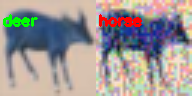

1/1 [==============================] - 0s 18ms/step


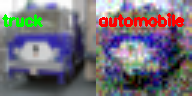

1/1 [==============================] - 0s 18ms/step


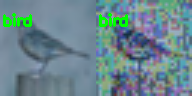

1/1 [==============================] - 0s 17ms/step


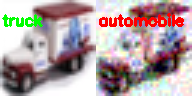

1/1 [==============================] - 0s 17ms/step


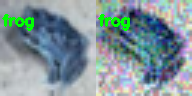

1/1 [==============================] - 0s 17ms/step


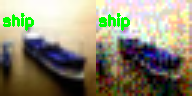

In [10]:
#이미지 라벨과 숫자 매칭
image_label=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

target=np.array([0,0,0,0,0,0,0,0,0,1]).reshape(1, 10) #유도를 원하는 라벨의 위치에 1 기입

# loop over a sample of our testing images
for i in np.random.choice(np.arange(0, len(testX)), size=(20,)):
	# grab the current image and label
	image = testX[i]
	label = testY[i]


	# generate an image adversary for the current image and make
	# a prediction on the adversary
	adversary = generate_image_adversary(model,
		image.reshape(1, 32, 32, 3), target, eps=30/255.0)
	pred = model.predict(adversary)

	# scale both the original image and adversary to the range
	# [0, 255] and convert them to an unsigned 8-bit integers
	adversary = adversary.reshape((32, 32,3)) * 255
	adversary = np.clip(adversary, 0, 255).astype("uint8")
	image = image.reshape((32, 32, 3)) * 255
	image = image.astype("uint8")
	# convert the image and adversarial image from grayscale to three
	# channel (so we can draw on them)
	#image = np.dstack([image] * 3)
	#adversary = np.dstack([adversary] * 3)
	# resize the images so we can better visualize them
	image = cv2.resize(image, (96, 96))
	adversary = cv2.resize(adversary, (96, 96))

	# determine the predicted label for both the original image and
	# adversarial image
	imagePred = label.argmax()
	adversaryPred = pred.argmax()
	color = (0, 255, 0)
	# if the image prediction does not match the adversarial
	# prediction then update the color
	if imagePred != adversaryPred:
		color = (0, 0, 255)
	# draw the predictions on the respective output images
	cv2.putText(image, image_label[imagePred], (2, 25),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
	cv2.putText(adversary, image_label[adversaryPred], (2, 25),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
	# stack the two images horizontally and then show the original
	# image and adversarial image
	output = np.hstack([image, adversary])
	cv2_imshow(output)
	cv2.waitKey(0)